# XGBoost

In [1]:
path=  'C:/Users/felipe/Documents/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felipe/Documents/Brain/Brain_Model/'
import sys
sys.path.append(path_) 

In [2]:
import xgboost as xgb
from base_regressor import BaseRegressor
from Plotter import Plotter

from skopt.space import Real, Categorical, Integer

class XGBoostRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="XGBoost"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
        
        self.model_ml = xgb.XGBRegressor
        if params is None:
            self.params = {
                'objective': 'reg:squarederror',
                'n_estimators': 100,
                'learning_rate': 0.1,
                'max_depth': 3,
                'subsample': 0.8,
                'colsample_bytree': 0.8
            }
        if params_space is None:
            self.params_space = {
                'n_estimators': Integer(50, 5000),
                'learning_rate': Real(0.0001, 0.2, prior='log-uniform'),
                'max_depth': Integer(3, 10),
                'subsample': Real(0.1, 1.0),
                'colsample_bytree': Real(0.1, 1.0)
            }

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# 72 Features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# Data

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle


file_path_CN = f'{path}Brain_Aging/CN_freq.xlsx'
file_path_AD = f'{path}Brain_Aging/AD_freq.xlsx'
file_path_FTD = f'{path}Brain_Aging/FTD_freq.xlsx'
file_path_MCI = f'{path}Brain_Aging/MCI_freq.xlsx'
file_path_PD = f'{path}Brain_Aging/PD_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)
df_AD = pd.read_excel(file_path_AD)
df_FTD = pd.read_excel(file_path_FTD)
df_MCI = pd.read_excel(file_path_MCI)
df_PD = pd.read_excel(file_path_PD)

df_CN_filtrado = df_CN[(df_CN['Age'] >=50) & (df_CN['Age'] <= 90)].reset_index(drop=True)
df_AD_filtrado = df_AD[(df_AD['Age'] >= 50) & (df_AD['Age'] <= 90)].reset_index(drop=True)
df_FTD_filtrado = df_FTD[(df_FTD['Age'] >= 50) & (df_FTD['Age'] <= 90)].reset_index(drop=True)
df_MCI_filtrado = df_MCI[(df_MCI['Age'] >= 50) & (df_MCI['Age'] <= 90)].reset_index(drop=True)
df_PD_filtrado = df_PD[(df_PD['Age'] >= 50) & (df_PD['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID-unique"]

X_AD = df_AD_filtrado[features]
y_AD = df_AD_filtrado["Age"]
ID_AD = df_AD_filtrado["ID-unique"]

X_FTD = df_FTD_filtrado[features]
y_FTD = df_FTD_filtrado["Age"]
ID_FTD = df_FTD_filtrado["ID-unique"]

X_MCI = df_MCI_filtrado[features]
y_MCI = df_MCI_filtrado["Age"]
ID_MCI = df_MCI_filtrado["ID-unique"]

X_PD = df_PD_filtrado[features]
y_PD = df_PD_filtrado["Age"]
ID_PD = df_PD_filtrado["ID-unique"]

# 
X_combined = pd.concat([X_CN, X_AD, X_FTD, X_MCI, X_PD], axis=0).reset_index(drop=True)
#X_combined = pd.concat([X_CN, X_AD], axis=0).reset_index(drop=True)
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)
X_AD_scaled = scaler.transform(X_AD)
X_FTD_scaled = scaler.transform(X_FTD)
X_MCI_scaled = scaler.transform(X_MCI)
X_PD_scaled = scaler.transform(X_PD)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)
X_AD_scaled = pd.DataFrame(X_AD_scaled, columns=X_AD.columns)
X_FTD_scaled = pd.DataFrame(X_FTD_scaled, columns=X_FTD.columns)
X_MCI_scaled = pd.DataFrame(X_MCI_scaled, columns=X_MCI.columns)
X_PD_scaled = pd.DataFrame(X_PD_scaled, columns=X_PD.columns)

In [5]:
df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)
df_concatenado_AD = pd.concat([X_AD, y_AD, ID_AD], axis=1, ignore_index=False)
df_concatenado_FTD = pd.concat([X_FTD, y_FTD, ID_FTD], axis=1, ignore_index=False)
df_concatenado_MCI = pd.concat([X_MCI, y_MCI, ID_MCI], axis=1, ignore_index=False)
df_concatenado_PD = pd.concat([X_PD, y_PD, ID_PD], axis=1, ignore_index=False)

lista_dfs = [df_concatenado_AD, df_concatenado_FTD, df_concatenado_MCI,df_concatenado_PD]

In [6]:
model = XGBoostRegressor()
Plotters = Plotter()

# Hyperparameter Tuning

In [7]:
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='r2')


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [8]:
with open(f'{path}Brain_Aging/Opt_Model/opt_XGBoost.pickle', 'wb') as file:
        pickle.dump(opt_model, file)

In [9]:
with open(f'{path}Brain_Aging/Opt_Model/opt_XGBoost.pickle', 'rb') as file:
    opt_model= pickle.load(file)

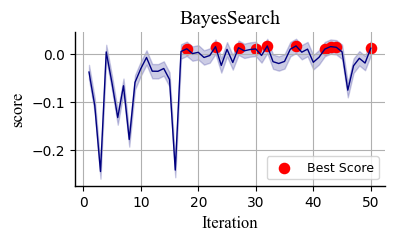

Top 1: Iteration 37, Score 0.01617560466748359
Top 2: Iteration 32, Score 0.016003208153034475
Top 3: Iteration 43, Score 0.014745396247392106
Top 4: Iteration 23, Score 0.014553655423730716
Top 5: Iteration 44, Score 0.013275422542982506
Top 6: Iteration 27, Score 0.012373695266765428
Top 7: Iteration 50, Score 0.011384389166134578
Top 8: Iteration 18, Score 0.010135895458161449
Top 9: Iteration 30, Score 0.00991342330272581
Top 10: Iteration 42, Score 0.00951824266229927


In [10]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.015)

In [11]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'colsample_bytree': 0.1,
  'learning_rate': 0.0007733650293011783,
  'max_depth': 10,
  'n_estimators': 5000,
  'subsample': 0.5166063811507885},
 {'colsample_bytree': 0.1,
  'learning_rate': 0.0007041994417209698,
  'max_depth': 6,
  'n_estimators': 5000,
  'subsample': 0.4534949420761164},
 {'colsample_bytree': 0.1,
  'learning_rate': 0.0005158317903743907,
  'max_depth': 10,
  'n_estimators': 5000,
  'subsample': 0.6512927062422458},
 {'colsample_bytree': 0.1,
  'learning_rate': 0.002571794444163138,
  'max_depth': 10,
  'n_estimators': 5000,
  'subsample': 0.44046539450183597},
 {'colsample_bytree': 0.1,
  'learning_rate': 0.0013508710467567888,
  'max_depth': 10,
  'n_estimators': 5000,
  'subsample': 0.5880196851133342},
 {'colsample_bytree': 0.1,
  'learning_rate': 0.000632589566247301,
  'max_depth': 10,
  'n_estimators': 5000,
  'subsample': 0.6854458450504768},
 {'colsample_bytree': 0.1,
  'learning_rate': 0.00036749281659180164,
  'max_depth': 7,
  'n_estimators': 5000,
  

# Training

In [12]:
results_labels_df_CN_train, results_labels_df_CN_test, results_labels_list, results_model, results_per_fold_CN_train, results_per_fold_CN_test, results_per_fold_pat= model.trainer(df_concatenado_CN, lista_dfs, n_splits=10, n_iterations=20, params_=best_params_[0])

C:\Users/felipe/Documents/Brain/Brain_Model\base_regressor.py:200: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN_train = pd.concat([results_labels_df_CN_train, temp_CN_df_train], ignore_index=True)
C:\Users/felipe/Documents/Brain/Brain_Model\base_regressor.py:202: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN_test = pd.concat([results_labels_df_CN_test, temp_CN_df_test], ignore_index=True)
C:\Users/felipe/Documents/Brain/Brain_Model\base_regressor.py:234

In [28]:
import xgboost as xgb
import os

# Crear el directorio si no existe
#os.makedirs('results_model', exist_ok=True)

# Suponiendo que results es tu diccionario con 200 modelos
for i, model in enumerate(results_model['model']):
    # Guardar cada modelo en un archivo separado
    model.save_model(f'E:/results_model/XGBoost/modelo_xgboost_{i + 1}.bin')

# Guardar el resto del diccionario sin los modelos
resto_results = {
    'mean_X_train_kf': results_model['mean_X_train_kf'],
    'std_X_train_kf': results_model['std_X_train_kf'],
    'slope': results_model['slope'],
    'intercept': results_model['intercept']
}

# Guardar el resto en un archivo
with open('results_model/resultados_sin_modelos.pkl', 'wb') as f:
    pickle.dump(resto_results, f)


c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:52:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:52:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:52:29] WARNI

In [30]:
for i, model in enumerate(results_model['model']):
    with open(f'E:/results_model/XGBoost_/modelo_xgboost_{i + 1}.pkl', 'wb') as f:
        pickle.dump(model, f)
    # Guardar cada modelo en un archivo separado
        #model.save_model(f'E:/results_model/XGBoost/modelo_xgboost_{i + 1}.bin')


MemoryError: 

In [31]:
import os

# Especifica la ruta de tu disco duro externo
ruta_disco_externo = 'E:/results_model/XGBoost_'  # Cambia esto a la ruta de tu disco duro externo

# Crear el directorio si no existe
#os.makedirs(ruta_disco_externo, exist_ok=True)

# Continuar guardando desde la iteración 113
for i, model in enumerate(results_model['model'][112:], start=113):  # Empieza en el modelo 113
    # Guardar cada modelo en un archivo separado usando save_model
    with open(f'E:/results_model/XGBoost_/modelo_xgboost_{i + 1}.pkl', 'wb') as f:
        pickle.dump(model, f)


XGBoostError: bad allocation

In [19]:
import pickle

# Lista de nombres de archivos para los resultados sin incluir el modelo
file_names = [
    'results_labels_df_CN_train.pkl',
    'results_labels_df_CN_test.pkl',
    'results_labels_list.pkl',
    'results_per_fold_CN_train.pkl',
    'results_per_fold_CN_test.pkl',
    'results_per_fold_pat.pkl'
]

# Resultados sin el modelo XGBoost
results_training_without_model = [
    results_labels_df_CN_train,
    results_labels_df_CN_test,
    results_labels_list,
    results_per_fold_CN_train,
    results_per_fold_CN_test,
    results_per_fold_pat
]

# Guardar cada objeto en su respectivo archivo
for result, file_name in zip(results_training_without_model, file_names):
    with open(f'results_model/{file_name}', 'wb') as f:
        pickle.dump(result, f)


In [ ]:
import pickle
import numpy as np

# Suponiendo que results es tu diccionario con 200 modelos
n_partes = 4  # Número de partes en las que quieres dividir
tamano_modelos = len(results_model['model'])
modelos_por_parte = tamano_modelos // n_partes

# Guardar los modelos en partes
for i in range(n_partes):
    inicio = i * modelos_por_parte
    if i == n_partes - 1:  # Para asegurarse de que el último grupo incluya los restantes
        fin = tamano_modelos
    else:
        fin = (i + 1) * modelos_por_parte

    # Crear un nuevo diccionario para cada parte
    parte_resultados = {
        'model': results_model['model'][inicio:fin],
        'mean_X_train_kf': results_model['mean_X_train_kf'][inicio:fin],
        'std_X_train_kf': results_model['std_X_train_kf'][inicio:fin],
        'slope': results_model['slope'][inicio:fin],
        'intercept': results_model['intercept'][inicio:fin]
    }

    # Guardar la parte en un archivo
    with open(f'E:/results_model/resultados_modelo_parte_{i + 1}.pkl', 'wb') as f:
        pickle.dump(parte_resultados, f)

In [ ]:
with open('results_model/resultados_modelo_.pkl', 'wb') as f:
    pickle.dump(results_model, f)

In [26]:
results_model

{'model': [XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.1, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.0007733650293011783,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=10, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=5000, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.1, device=None, early_stopping_rounds=None,
     

In [ ]:
results_model['model']

In [16]:
import pickle

results_training = [results_labels_df_CN_train, results_labels_df_CN_test, results_labels_list, 
           results_model, results_per_fold_CN_train, results_per_fold_CN_test, results_per_fold_pat]



In [ ]:
with open('results_model/resultados_modelo.pkl', 'wb') as f:
    pickle.dump(results_training, f)

In [ ]:
from joblib import dump
dump(results_training, 'results_model/resultados_modelo.joblib')


In [ ]:
with open('results_model/resultados_modelo.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_labels_list, results_model, results_per_fold_CN_train, results_per_fold_CN_test, results_per_fold_pat = loaded_results

In [ ]:
results_labels_df_AD=results_labels_list[0]
results_labels_df_FTD=results_labels_list[1]
results_labels_df_MCI=results_labels_list[2]
results_labels_df_PD=results_labels_list[3]

results_labels_df_total = [results_labels_df_CN_test, results_labels_df_AD, results_labels_df_FTD,results_labels_df_MCI,results_labels_df_PD]

results_avg_list = model.avg_list(results_labels_df_total)

results_avg_list_CN = results_avg_list[0]
results_avg_list_AD = results_avg_list[1]
results_avg_list_FTD = results_avg_list[2]
results_avg_list_MCI = results_avg_list[3]
results_avg_list_PD = results_avg_list[4]

df_CN_seleccion = df_CN_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_combined = results_avg_list_CN.merge(df_CN_seleccion, on='ID-unique', how='left')

df_AD_seleccion = df_AD_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_AD_combined = results_avg_list_AD.merge(df_AD_seleccion, on='ID-unique', how='left')

df_FTD_seleccion = df_FTD_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']]
df_FTD_combined = results_avg_list_CN.merge(df_FTD_seleccion, on='ID-unique', how='left')

df_MCI_seleccion = df_MCI_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_MCI_combined = results_avg_list_MCI.merge(df_MCI_seleccion, on='ID-unique', how='left')

df_PD_seleccion = df_PD_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_PD_combined = results_avg_list_PD.merge(df_PD_seleccion, on='ID-unique', how='left')


In [ ]:
# Guardar los dataframes combinados en archivos Excel
df_CN_combined.to_excel('results/df_CN_combined.xlsx', index=False)
df_AD_combined.to_excel('results/df_AD_combined.xlsx', index=False)
df_FTD_combined.to_excel('results/df_FTD_combined.xlsx', index=False)
df_MCI_combined.to_excel('results/df_MCI_combined.xlsx', index=False)
df_PD_combined.to_excel('results/df_PD_combined.xlsx', index=False)


In [ ]:
# Crear un DataFrame en formato largo para los errores
corrected_gap_AD = pd.to_numeric(results_avg_list[1]['GAP_corrected'])
corrected_gap_FTD = pd.to_numeric(results_avg_list[2]['GAP_corrected'])
corrected_gap_MCI = pd.to_numeric(results_avg_list[3]['GAP_corrected'])
corrected_gap_CN_test = pd.to_numeric(results_avg_list[0]['GAP_corrected'])
corrected_gap_PD = pd.to_numeric(results_avg_list[4]['GAP_corrected'])

data = {
    'Error': np.concatenate([corrected_gap_PD, corrected_gap_AD, corrected_gap_FTD, corrected_gap_MCI, corrected_gap_CN_test]),
    'Grupo': ['PD'] * len(corrected_gap_PD) + ['AD'] * len(corrected_gap_AD) + ['FTD'] * len(corrected_gap_FTD) + ['MCI'] * len(corrected_gap_MCI) + ['CN'] * len(corrected_gap_CN_test)
}

df_errors = pd.DataFrame(data)

# Definir la paleta de colores personalizada
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'MCI': 'lightgreen',
    'PD': 'orange',
    'CN': 'gray'
}

Plotters.plot_gap_distribution(df_errors, colores_personalizados,x_size=6, y_size=3,font='Times New Roman', weight='normal', xlabel='Gap (years)', x_limits=(-3, 4),fontsize=14)

In [ ]:
results_avg_CN = results_avg_list[0][['y_labels', 'y_pred']].copy()
results_avg_AD = results_avg_list[1][['y_labels', 'y_pred']].copy()
results_avg_FTD     = results_avg_list[2][['y_labels', 'y_pred']].copy()
results_avg_MCI = results_avg_list[3][['y_labels', 'y_pred']].copy()
results_avg_PD = results_avg_list[4][['y_labels', 'y_pred']].copy()

df_list = [results_avg_CN, results_avg_AD, results_avg_FTD, results_avg_MCI, results_avg_PD]
colors = {'CN': 'black', 'AD': 'blue', 'FTD': 'red', 'MCI': 'green', 'PD': 'orange'}
labels = ['CN', 'AD', 'FTD', 'MCI', 'PD']
Plotters.plot_regression_diagnosis(df_list=df_list, colors=colors, title='Brain Age Comparison',labels=labels,x_ticks_step=10,y_ticks_step=2,x_min_limit=50,y_min_limit=62,x_max_limit=90,y_max_limit=72,line_ideal=False, alpha=0.5, xlabel='Chronological Age',ylabel='Brain Age',  font='Times New Roman', weight='normal', x_size=4,y_size=4, legend=True, fontsize=13, mode=3,xticks =1,yticks=1)

In [ ]:
# SHAP